# Task3.Linear Regression

#### 1.Importing and preprocessing the dataset

In [405]:
#importing necessary libraries
import numpy as np
import pandas as pd


In [406]:
#importing the dataset
pd.set_option('display.max_columns',None)
data=pd.read_csv('Housing.csv')
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [407]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [408]:
#encoding categorical variables
cat_cols=data.select_dtypes(include=['object']).columns
cat_cols

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [409]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_cols:
    if col==cat_cols[-1]:
        break
    data[col]=le.fit_transform(data[col])

# One-hot encoding furnishing status
data= pd.get_dummies(data,columns=['furnishingstatus'], prefix='furnishing',dtype=int)


In [410]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_furnished,furnishing_semi-furnished,furnishing_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [411]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler

#Normalising the numerical features

# RobustScaler for area (outlier-sensitive)
robust_scaler = RobustScaler()
data['area'] = robust_scaler.fit_transform(data[['area']])


num_cols = ['bedrooms', 'bathrooms', 'stories', 'parking']
minmax_scaler = MinMaxScaler()
data[num_cols] = minmax_scaler.fit_transform(data[num_cols])

#### 2.Splitting the dataset

In [412]:
from sklearn.model_selection import train_test_split
data.shape

(545, 15)

In [413]:
X=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [414]:
print(X.shape)
print(y.shape)


(545, 14)
(545,)


In [415]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### 3.Fitting the Multiple regression Model

In [416]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

#### 4.Evaluating Model 

In [417]:
from sklearn.metrics import (mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error)

In [418]:
#generating predictions using X_test
y_pred=regressor.predict(X_test)

In [419]:
#Calculating metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: ₹{mae:,.2f}")
print(f"MSE: ₹{mse:,.2f}")
print(f"RMSE: ₹{rmse:,.2f}")
print(f"R²: {r2:.4f}")


MAE: ₹970,043.40
MSE: ₹1,754,318,687,330.67
RMSE: ₹1,324,506.96
R²: 0.6529


#### 5.PLotting regression line and interpreting coefficients

In [420]:
print("Model Intercept:",regressor.intercept_)

features = data.columns[1:]
coefficients = regressor.coef_

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values('Coefficient', key=abs, ascending=False)
print("Model Coefficients:")
print(coef_df)

Model Intercept: 2744013.3146132748
Model Coefficients:
                      Feature   Coefficient
2                   bathrooms  3.283334e+06
3                     stories  1.222430e+06
8             airconditioning  7.914267e+05
7             hotwaterheating  6.846499e+05
9                     parking  6.745257e+05
0                        area  6.512739e+05
10                   prefarea  6.298906e+05
6                    basement  3.902512e+05
1                    bedrooms  3.838935e+05
4                    mainroad  3.679199e+05
13     furnishing_unfurnished -2.334694e+05
5                   guestroom  2.316100e+05
11       furnishing_furnished  1.801756e+05
12  furnishing_semi-furnished  5.329381e+04


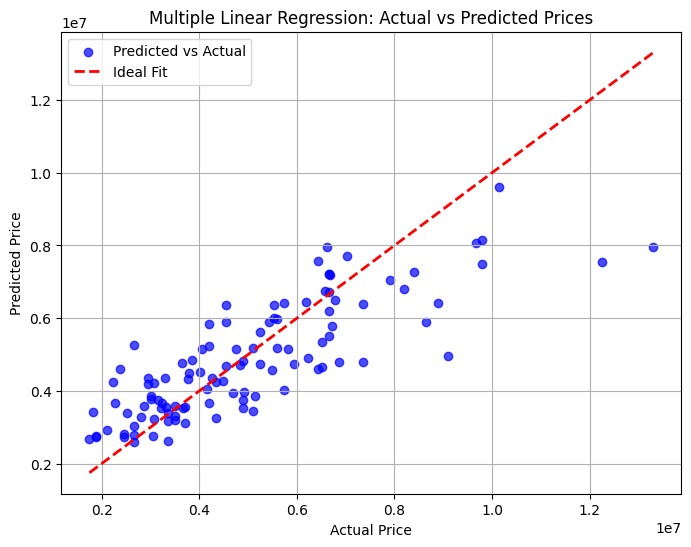

In [421]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression: Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()